In [5]:
import pandas as pd

In [6]:
# (1) Используя параметры pandas прочитать красиво пандас 
df = pd.read_csv('UCI_Credit_Card.csv') #TODO

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [13]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)

In [4]:
#TODO

# Выводим типы переменных, смотрим пропуски
df.info()

# Считаем статистики для AGE
df['AGE'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [44]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
#TODO

# по-любому можно сделать как-то проще :)
# df[['SEX','EDUCATION']].where(df['SEX'] == 2).where(df['EDUCATION'] == 2).groupby('EDUCATION').count()
df.where(df['SEX'] == 2).where(df['EDUCATION'] == 2).count()


ID                            8656
LIMIT_BAL                     8656
SEX                           8656
EDUCATION                     8656
MARRIAGE                      8656
AGE                           8656
PAY_0                         8656
PAY_2                         8656
PAY_3                         8656
PAY_4                         8656
PAY_5                         8656
PAY_6                         8656
BILL_AMT1                     8656
BILL_AMT2                     8656
BILL_AMT3                     8656
BILL_AMT4                     8656
BILL_AMT5                     8656
BILL_AMT6                     8656
PAY_AMT1                      8656
PAY_AMT2                      8656
PAY_AMT3                      8656
PAY_AMT4                      8656
PAY_AMT5                      8656
PAY_AMT6                      8656
default.payment.next.month    8656
dtype: int64

In [84]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO

df_pb = df[df.columns[6:25]]
df_pb.groupby('default.payment.next.month').median()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1,0,0,0,0,0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [109]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE
#TODO

df.pivot_table('SEX','EDUCATION','MARRIAGE','count')

MARRIAGE,0,1,2,3
EDUCATION,,,,
0,NaN,4.0,10.0,NaN
1,4.0,3722.0,6809.0,50.0
2,6.0,6842.0,7020.0,162.0
3,44.0,2861.0,1909.0,103.0
4,NaN,52.0,68.0,3.0
5,NaN,150.0,127.0,3.0
6,NaN,28.0,21.0,2.0


In [97]:
# (6) Создать новый строковый столбец в dataframe-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

#TODO

letter = []

for row in df['LIMIT_BAL']:
    if row <= 10000:
        letter.append('A')
    elif row > 10000 and row <= 100000:
        letter.append('B')
    elif row > 100000 and row <= 200000:
        letter.append('C')
    elif row > 200000 and row <= 400000:
        letter.append('D')
    elif row > 400000 and row <= 700000:
        letter.append('E')
    elif row > 700000:
        letter.append('F')

df['LETTER'] = letter
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,LETTER
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,B
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,C
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,B
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,B
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,B
5,6,50000.0,1,1,2,37,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,B
6,7,500000.0,1,1,2,29,0,0,0,0,...,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,E
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,B
8,9,140000.0,2,3,1,28,0,0,2,0,...,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0,C
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0,B


In [98]:
%matplotlib inline

(0, 1000000)

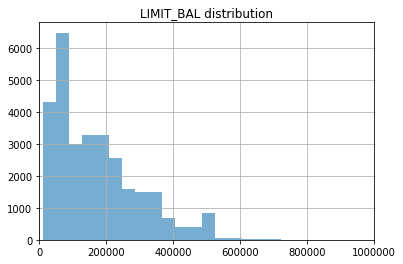

In [107]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

import matplotlib.pyplot as plt
df['LIMIT_BAL'].hist(bins=25, alpha=0.6)
plt.title("LIMIT_BAL distribution")
plt.xlim(0, 1000000)

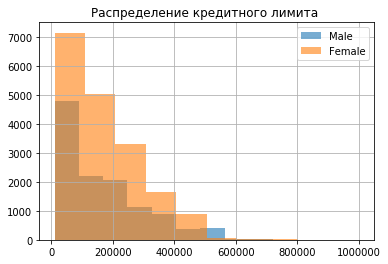

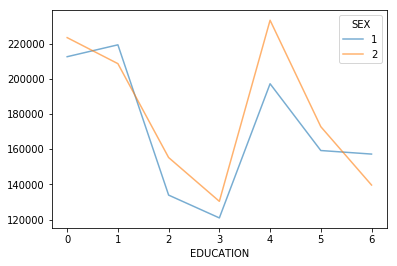

In [140]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)

df['LIMIT_BAL'].where(df['SEX'] == 1).hist(alpha=0.6, label="Male")
df['LIMIT_BAL'].where(df['SEX'] == 2).hist(alpha=0.6, label="Female")
plt.legend()
plt.title("Распределение кредитного лимита ")

df.pivot_table(values='LIMIT_BAL', index='EDUCATION', columns ='SEX').plot(alpha=0.6)

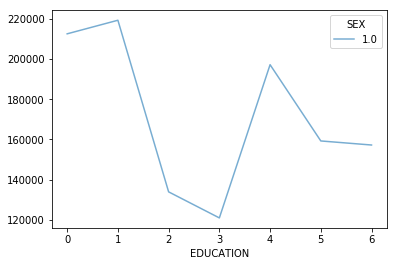

In [141]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO
df.where(df['SEX'] == 1).pivot_table(values='LIMIT_BAL', index='EDUCATION', columns ='SEX').plot(alpha=0.6)

In [2]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)

#TODO

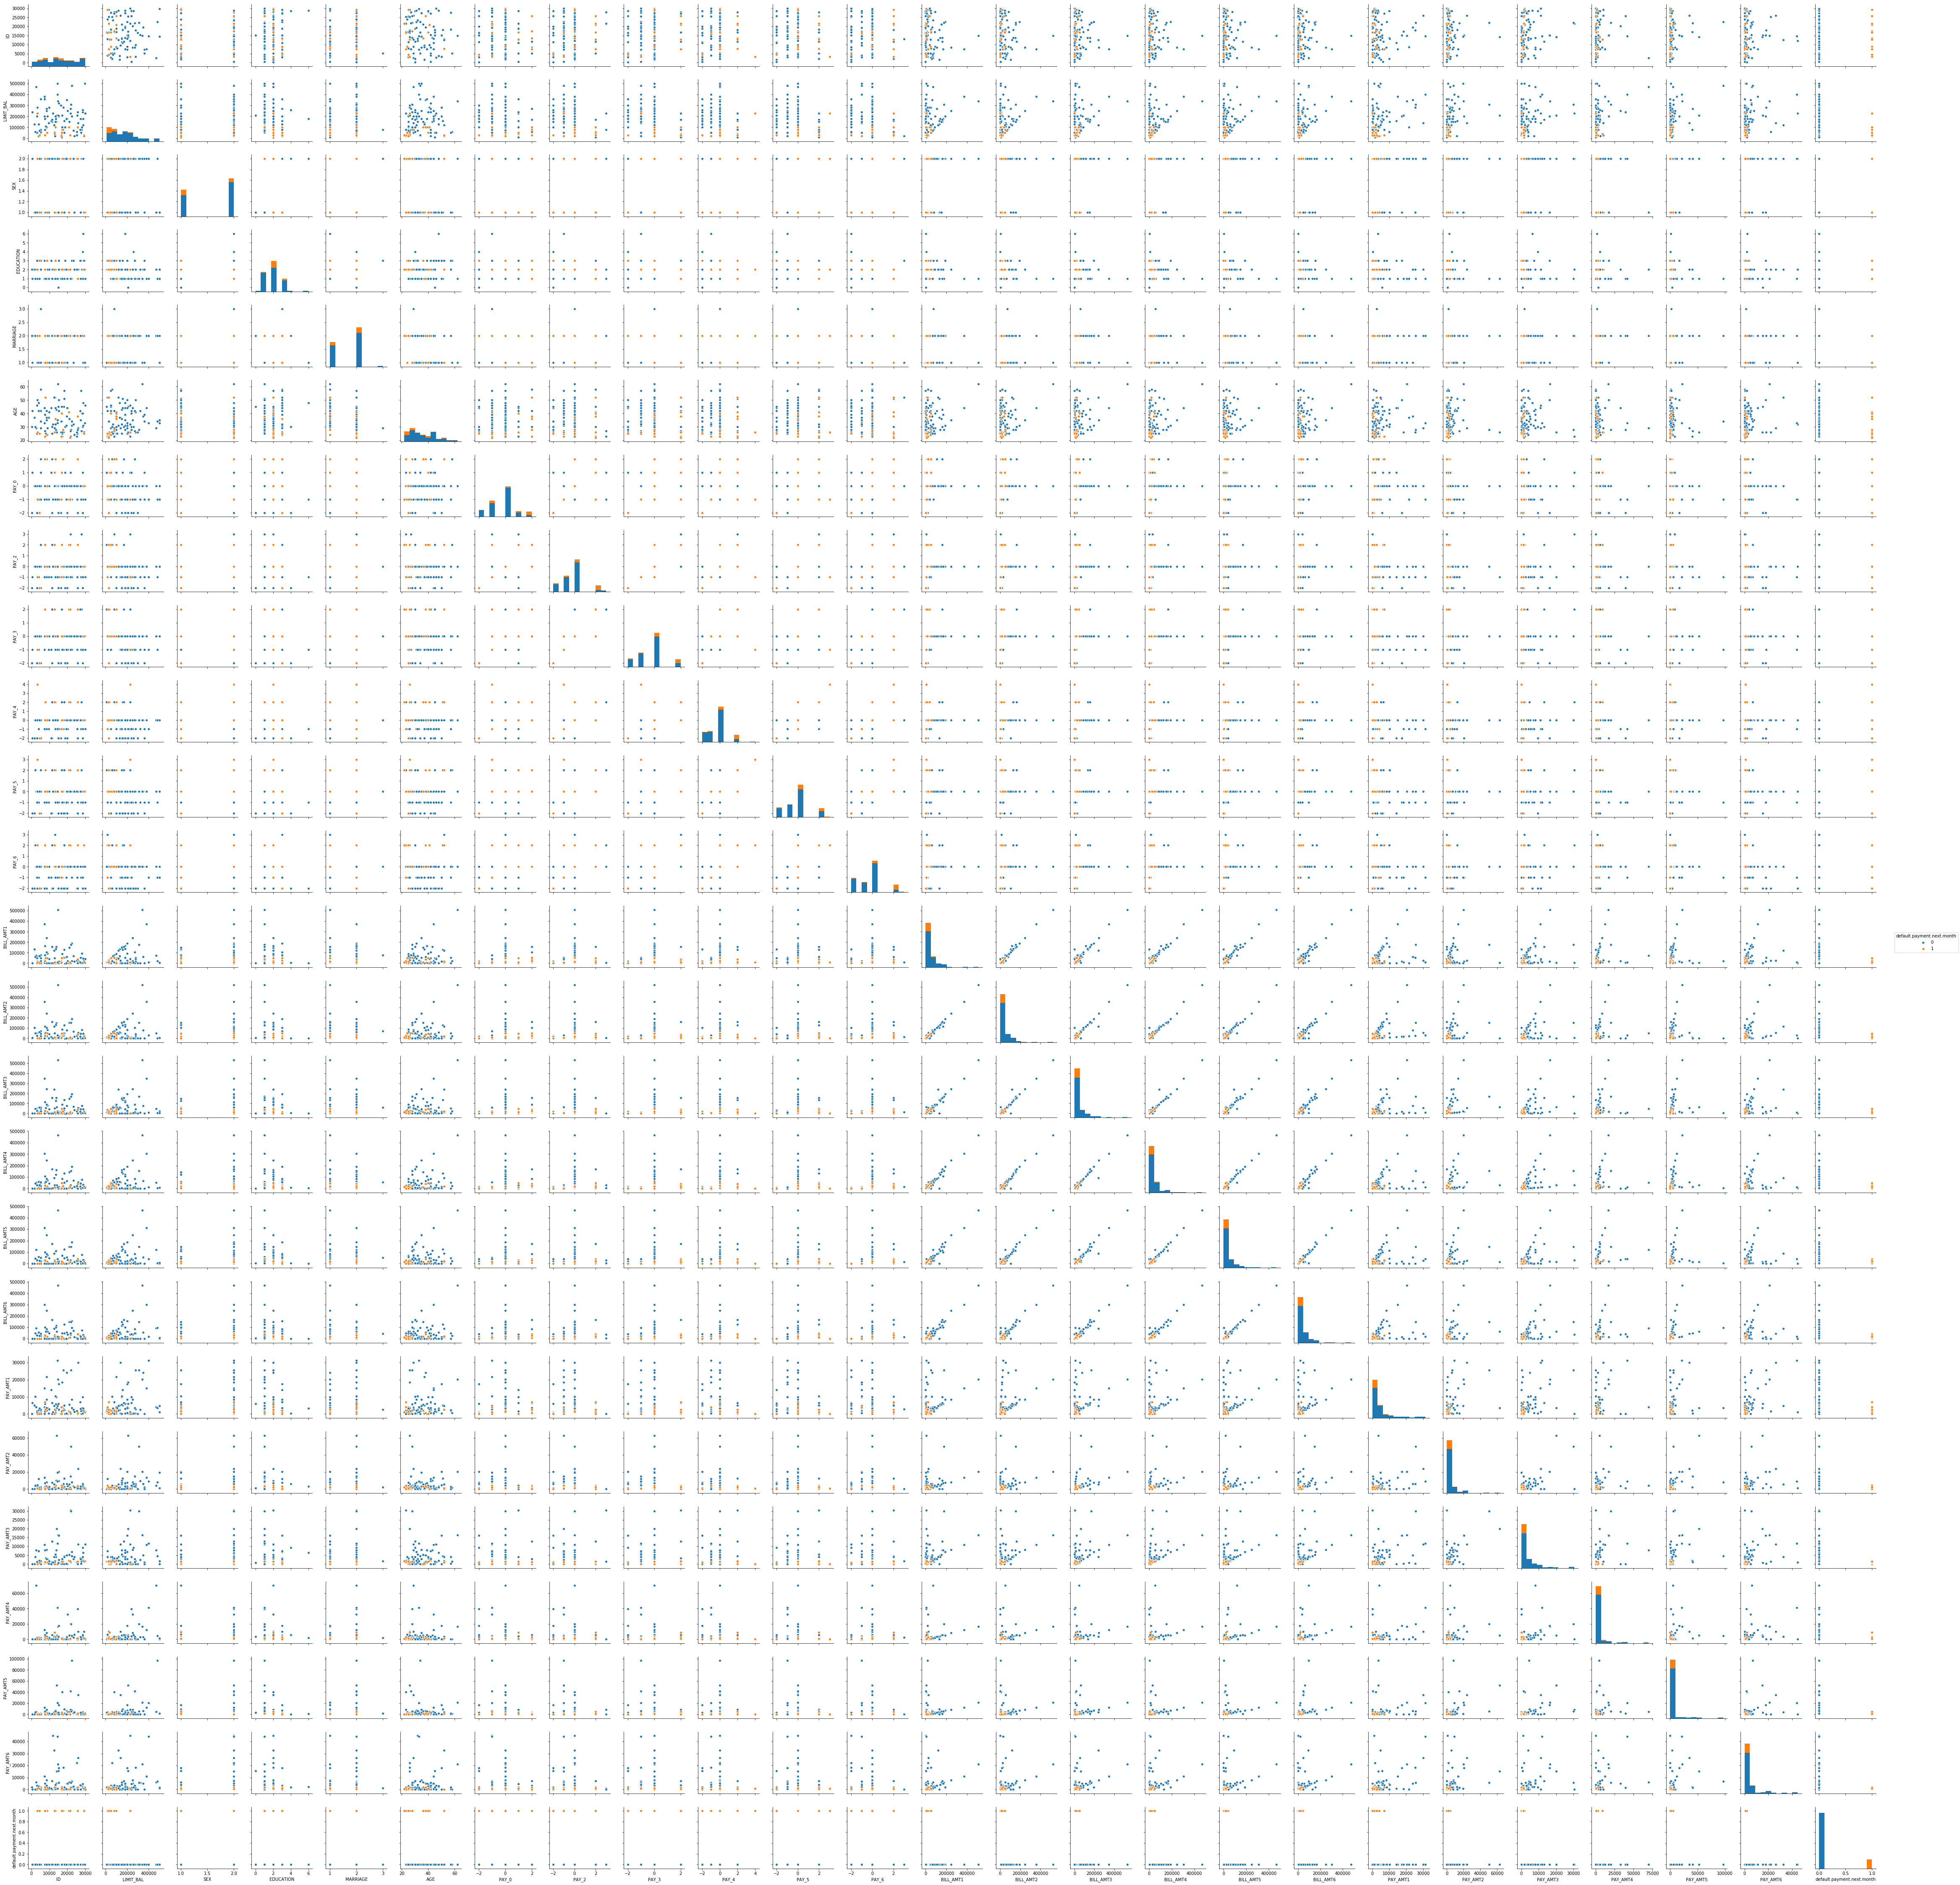

In [7]:
import seaborn as sns
sns.pairplot(df.sample(100), hue='default.payment.next.month')